# Importing Libraries

In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Loading DataSet

In [226]:
df = pd.read_csv("train.csv")
df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


# Data Feature Explanation

1. **Passenger Id:** and id given to each traveler on the boat
2. **Pclass:** the passenger class. It has three possible values: 1,2,3 (first, second and third class)
3. **Name:** The Name of the passenger
4. **Sex:** Gender of the passanger
5. **Age:** age of the passanger
6. **SibSp:** number of siblings and spouses traveling with the passenger
7. **Parch:** number of parents and children traveling with the passenger
8. **Ticket:** The ticket number
9. **Fare:** The ticket Fare
10. **Cabin:** The cabin number
11. **Embarked:** This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q


# Exploratory Data Analysis and Feature Engineering

#### Printing Columns and shape

In [227]:
print(df.columns)
print(df.shape)
print("-----------")
print(pd.unique(df.Embarked))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
-----------
['S' 'C' 'Q' nan]


In [228]:
df.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


In [229]:
df.Embarked = df.Embarked.fillna("S")

In [230]:
le = LabelEncoder()
sex = le.fit_transform(df.Sex)

In [231]:
df.Sex = sex

In [232]:
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis = 1)

In [233]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.023233
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
C,-0.001205,0.168240,-0.243292,-0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Q,-0.033606,0.003650,0.221009,-0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421


In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 86.2+ KB


In [ ]:
print(pd.unique(df.Cabin))

#### Removing columns
1. Chaning index to PassangerId
2. Removing columns -
    * Ticket
    * Name
    * PassangerId
    * Embarked
    * Cabin


In [235]:
df.index = df.PassengerId
df.drop(columns=["Ticket", "Name", "PassengerId", "Embarked", "Cabin"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
2,1,1,0,38.0,1,0,71.2833,1,0,0
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1


# Handeling Missing Data

In [246]:
nullAge = df[df.Age.isnull()]
notNullAge = df[df.Age.isnull() == False]
nullAge.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [247]:
X_nullAge = nullAge.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']]
y_nullAge = nullAge.loc[:, 'Age']
X_notNullAge = notNullAge.loc[:, ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']]
y_notNullAge = notNullAge.loc[:, 'Age']

In [248]:
X_train_notNullAge, X_test_notNullAge, y_train_notNullAge, y_test_notNullAge = train_test_split(X_notNullAge, 
                                                                                                y_notNullAge, 
                                                                                                test_size=0.25,
                                                                                                random_state=33)

In [ ]:
depthToR2 = []

for estimator in range (1, 1001):
    oldScore = -1
    Scorecounter = 0
    for depth in range(1,101):
        print("Estimator --> ", estimator, " Depth --> ", depth)
        reg = RandomForestRegressor(n_estimators=estimator, max_depth=depth, random_state=33)
        reg.fit(X_train_notNullAge, y_train_notNullAge)
        y_pred_notNullAge = reg.predict(X_test_notNullAge)
        R2Score = r2_score(y_test_notNullAge, y_pred_notNullAge)
        depthToR2.append([estimator, depth, R2Score])
        print("Score --> ", R2Score, "\n")
        
        if oldScore <= R2Score:
            oldScore = R2Score
            Scorecounter = 0
        else:
            Scorecounter = Scorecounter+1
        if Scorecounter == 8:
            print("------------BREAKING-------------", "\n")
            break

Estimator -->  1  Depth -->  1
Score -->  0.0932327003512996 

Estimator -->  1  Depth -->  2
Score -->  0.21605797988813902 

Estimator -->  1  Depth -->  3
Score -->  0.2586741464447728 

Estimator -->  1  Depth -->  4
Score -->  0.2635312972076923 

Estimator -->  1  Depth -->  5
Score -->  0.2226533064410453 

Estimator -->  1  Depth -->  6
Score -->  0.25355373075710896 

Estimator -->  1  Depth -->  7
Score -->  0.08687621103021859 

Estimator -->  1  Depth -->  8
Score -->  0.09830028147049985 

Estimator -->  1  Depth -->  9
Score -->  0.11685514637196348 

Estimator -->  1  Depth -->  10
Score -->  0.12274946267080544 

Estimator -->  1  Depth -->  11
Score -->  0.1092309076028698 

Estimator -->  1  Depth -->  12
Score -->  0.1092309076028698 

------------BREAKING------------- 

Estimator -->  2  Depth -->  1
Score -->  0.17138103760349244 

Estimator -->  2  Depth -->  2
Score -->  0.28832945622698636 

Estimator -->  2  Depth -->  3
Score -->  0.3451461365121069 

Estimato

Score -->  0.3605055912204287 

Estimator -->  10  Depth -->  13
Score -->  0.35812988258910505 

Estimator -->  10  Depth -->  14
Score -->  0.35812988258910505 

------------BREAKING------------- 

Estimator -->  11  Depth -->  1
Score -->  0.18198868035150106 

Estimator -->  11  Depth -->  2
Score -->  0.3067382360600849 

Estimator -->  11  Depth -->  3
Score -->  0.3687585275590991 

Estimator -->  11  Depth -->  4
Score -->  0.38441014789474837 

Estimator -->  11  Depth -->  5
Score -->  0.3926279715140292 

Estimator -->  11  Depth -->  6
Score -->  0.39955895425231835 

Estimator -->  11  Depth -->  7
Score -->  0.3755527166571403 

Estimator -->  11  Depth -->  8
Score -->  0.37415498227825295 

Estimator -->  11  Depth -->  9
Score -->  0.3612751094654194 

Estimator -->  11  Depth -->  10
Score -->  0.36289554329789997 

Estimator -->  11  Depth -->  11
Score -->  0.3610485374449609 

Estimator -->  11  Depth -->  12
Score -->  0.36313176920877066 

Estimator -->  11  Dept

Score -->  0.37868035071212613 

Estimator -->  20  Depth -->  9
Score -->  0.36702572612913875 

Estimator -->  20  Depth -->  10
Score -->  0.3668523616671101 

Estimator -->  20  Depth -->  11
Score -->  0.36575303314431107 

Estimator -->  20  Depth -->  12
Score -->  0.36678620547421337 

Estimator -->  20  Depth -->  13
Score -->  0.36567798716415 

------------BREAKING------------- 

Estimator -->  21  Depth -->  1
Score -->  0.1821599782790393 

Estimator -->  21  Depth -->  2
Score -->  0.30739987610867514 

Estimator -->  21  Depth -->  3
Score -->  0.3589877678058815 

Estimator -->  21  Depth -->  4
Score -->  0.3805485900407427 

Estimator -->  21  Depth -->  5
Score -->  0.3965344503824887 

Estimator -->  21  Depth -->  6
Score -->  0.39590514147935685 

Estimator -->  21  Depth -->  7
Score -->  0.3811586752481343 

Estimator -->  21  Depth -->  8
Score -->  0.3788610123851459 

Estimator -->  21  Depth -->  9
Score -->  0.36615910355723547 

Estimator -->  21  Depth --

Score -->  0.3984049356123621 

Estimator -->  30  Depth -->  7
Score -->  0.3833020724405699 

Estimator -->  30  Depth -->  8
Score -->  0.3786808483336441 

Estimator -->  30  Depth -->  9
Score -->  0.36776358232864326 

Estimator -->  30  Depth -->  10
Score -->  0.36780019745900383 

Estimator -->  30  Depth -->  11
Score -->  0.3674696411921281 

Estimator -->  30  Depth -->  12
Score -->  0.367122964102893 

Estimator -->  30  Depth -->  13
Score -->  0.3666765466976889 

------------BREAKING------------- 

Estimator -->  31  Depth -->  1
Score -->  0.17835931459997212 

Estimator -->  31  Depth -->  2
Score -->  0.3077502565041046 

Estimator -->  31  Depth -->  3
Score -->  0.3579058633289409 

Estimator -->  31  Depth -->  4
Score -->  0.38238452580321936 

Estimator -->  31  Depth -->  5
Score -->  0.40170120828761346 

Estimator -->  31  Depth -->  6
Score -->  0.39671634670635203 

Estimator -->  31  Depth -->  7
Score -->  0.3806822444609985 

Estimator -->  31  Depth --

Score -->  0.4040151418436241 

Estimator -->  40  Depth -->  6
Score -->  0.3992925243286749 

Estimator -->  40  Depth -->  7
Score -->  0.3860090660776705 

Estimator -->  40  Depth -->  8
Score -->  0.3809620821241162 

Estimator -->  40  Depth -->  9
Score -->  0.3708847626354286 

Estimator -->  40  Depth -->  10
Score -->  0.3726557478320619 

Estimator -->  40  Depth -->  11
Score -->  0.37254265348873705 

Estimator -->  40  Depth -->  12
Score -->  0.37239579682253254 

Estimator -->  40  Depth -->  13
Score -->  0.37240218886187515 

------------BREAKING------------- 

Estimator -->  41  Depth -->  1
Score -->  0.17110600714510493 

Estimator -->  41  Depth -->  2
Score -->  0.30715596980577975 

Estimator -->  41  Depth -->  3
Score -->  0.35700973027494987 

Estimator -->  41  Depth -->  4
Score -->  0.38675312320518507 

Estimator -->  41  Depth -->  5
Score -->  0.4049168832200529 

Estimator -->  41  Depth -->  6
Score -->  0.4001951948492922 

Estimator -->  41  Depth 

Score -->  0.3689837748738112 

------------BREAKING------------- 

Estimator -->  50  Depth -->  1
Score -->  0.16853150417220542 

Estimator -->  50  Depth -->  2
Score -->  0.3074537703142055 

Estimator -->  50  Depth -->  3
Score -->  0.3563692900531239 

Estimator -->  50  Depth -->  4
Score -->  0.38463245253991984 

Estimator -->  50  Depth -->  5
Score -->  0.4035802911205306 

Estimator -->  50  Depth -->  6
Score -->  0.4010141432641444 

Estimator -->  50  Depth -->  7
Score -->  0.3834759314591252 

Estimator -->  50  Depth -->  8
Score -->  0.37689467402296606 

Estimator -->  50  Depth -->  9
Score -->  0.36826297721083046 

Estimator -->  50  Depth -->  10
Score -->  0.36862028165749894 

Estimator -->  50  Depth -->  11
Score -->  0.369352809914574 

Estimator -->  50  Depth -->  12
Score -->  0.36859943412121376 

Estimator -->  50  Depth -->  13
Score -->  0.3690541046892284 

------------BREAKING------------- 

Estimator -->  51  Depth -->  1
Score -->  0.1679111344

Score -->  0.40609461610972974 

Estimator -->  59  Depth -->  6
Score -->  0.4058324920759452 

Estimator -->  59  Depth -->  7
Score -->  0.38819157878573285 

Estimator -->  59  Depth -->  8
Score -->  0.3783410347816262 

Estimator -->  59  Depth -->  9
Score -->  0.3704621031815133 

Estimator -->  59  Depth -->  10
Score -->  0.37168603404495426 

Estimator -->  59  Depth -->  11
Score -->  0.3711056387912878 

Estimator -->  59  Depth -->  12
Score -->  0.3708987225437895 

Estimator -->  59  Depth -->  13
Score -->  0.3712061883965262 

------------BREAKING------------- 

Estimator -->  60  Depth -->  1
Score -->  0.17231362498185443 

Estimator -->  60  Depth -->  2
Score -->  0.30678474119190857 

Estimator -->  60  Depth -->  3
Score -->  0.3581103295737593 

Estimator -->  60  Depth -->  4
Score -->  0.38804728287937473 

Estimator -->  60  Depth -->  5
Score -->  0.40659352491390555 

Estimator -->  60  Depth -->  6
Score -->  0.4061621794627386 

Estimator -->  60  Depth 

Score -->  0.3743776557326698 

Estimator -->  68  Depth -->  11
Score -->  0.3742297093282676 

Estimator -->  68  Depth -->  12
Score -->  0.37408812208535813 

Estimator -->  68  Depth -->  13
Score -->  0.37437911848700944 

Estimator -->  68  Depth -->  14
Score -->  0.37437911848700944 

------------BREAKING------------- 

Estimator -->  69  Depth -->  1
Score -->  0.17446439433697936 

Estimator -->  69  Depth -->  2
Score -->  0.30587813536883635 

Estimator -->  69  Depth -->  3
Score -->  0.35677025990200495 

Estimator -->  69  Depth -->  4
Score -->  0.38614523120662847 

Estimator -->  69  Depth -->  5
Score -->  0.40468905685635026 

Estimator -->  69  Depth -->  6
Score -->  0.40480293258994693 

Estimator -->  69  Depth -->  7
Score -->  0.3890735030650808 

Estimator -->  69  Depth -->  8
Score -->  0.37890643800436874 

Estimator -->  69  Depth -->  9
Score -->  0.3728407977602979 

Estimator -->  69  Depth -->  10
Score -->  0.3737359783180082 

Estimator -->  69  De

Score -->  0.30851873612681113 

Estimator -->  78  Depth -->  3
Score -->  0.3584504743864285 

Estimator -->  78  Depth -->  4
Score -->  0.3872775257876716 

Estimator -->  78  Depth -->  5
Score -->  0.40498166633460464 

Estimator -->  78  Depth -->  6
Score -->  0.4031726801534167 

Estimator -->  78  Depth -->  7
Score -->  0.3877670022866232 

Estimator -->  78  Depth -->  8
Score -->  0.3783123965496139 

Estimator -->  78  Depth -->  9
Score -->  0.3723736042852823 

Estimator -->  78  Depth -->  10
Score -->  0.37345431569709775 

Estimator -->  78  Depth -->  11
Score -->  0.3731145536585255 

Estimator -->  78  Depth -->  12
Score -->  0.3727033653651025 

Estimator -->  78  Depth -->  13
Score -->  0.3728501092175799 

------------BREAKING------------- 

Estimator -->  79  Depth -->  1
Score -->  0.1775386550516871 

Estimator -->  79  Depth -->  2
Score -->  0.3089727660024548 

Estimator -->  79  Depth -->  3
Score -->  0.3589490107376633 

Estimator -->  79  Depth --> 

Score -->  0.37006398695244813 

Estimator -->  87  Depth -->  11
Score -->  0.36993535552730694 

Estimator -->  87  Depth -->  12
Score -->  0.3697591181491581 

Estimator -->  87  Depth -->  13
Score -->  0.3699247480050184 

------------BREAKING------------- 

Estimator -->  88  Depth -->  1
Score -->  0.17747995665528715 

Estimator -->  88  Depth -->  2
Score -->  0.31071453457001796 

Estimator -->  88  Depth -->  3
Score -->  0.3599825524022465 

Estimator -->  88  Depth -->  4
Score -->  0.387484926964457 

Estimator -->  88  Depth -->  5
Score -->  0.4044822638527934 

Estimator -->  88  Depth -->  6
Score -->  0.4013057677627242 

Estimator -->  88  Depth -->  7
Score -->  0.3857091665046023 

Estimator -->  88  Depth -->  8
Score -->  0.37667152640165014 

Estimator -->  88  Depth -->  9
Score -->  0.3705984687059577 

Estimator -->  88  Depth -->  10
Score -->  0.37061429994542694 

Estimator -->  88  Depth -->  11
Score -->  0.3703857917103529 

Estimator -->  88  Depth -

Score -->  0.38591974877953605 

Estimator -->  97  Depth -->  5
Score -->  0.40390609085456797 

Estimator -->  97  Depth -->  6
Score -->  0.40049702105339213 

Estimator -->  97  Depth -->  7
Score -->  0.38689423341096896 

Estimator -->  97  Depth -->  8
Score -->  0.3787194999513207 

Estimator -->  97  Depth -->  9
Score -->  0.3737385435528574 

Estimator -->  97  Depth -->  10
Score -->  0.3729297279923821 

Estimator -->  97  Depth -->  11
Score -->  0.37308238744936084 

Estimator -->  97  Depth -->  12
Score -->  0.3724321172169057 

Estimator -->  97  Depth -->  13
Score -->  0.372961848784391 

------------BREAKING------------- 

Estimator -->  98  Depth -->  1
Score -->  0.17592541711570697 

Estimator -->  98  Depth -->  2
Score -->  0.31077317063640675 

Estimator -->  98  Depth -->  3
Score -->  0.360091356812135 

Estimator -->  98  Depth -->  4
Score -->  0.3863132243922883 

Estimator -->  98  Depth -->  5
Score -->  0.40440427252797306 

Estimator -->  98  Depth -

Score -->  0.3771610749158507 

Estimator -->  106  Depth -->  9
Score -->  0.3732295831724155 

Estimator -->  106  Depth -->  10
Score -->  0.37195719484757783 

Estimator -->  106  Depth -->  11
Score -->  0.3717549608220654 

Estimator -->  106  Depth -->  12
Score -->  0.37153400182261287 

Estimator -->  106  Depth -->  13
Score -->  0.37163678184703197 

------------BREAKING------------- 

Estimator -->  107  Depth -->  1
Score -->  0.17450293135381278 

Estimator -->  107  Depth -->  2
Score -->  0.3107610747961821 

Estimator -->  107  Depth -->  3
Score -->  0.36009171509699023 

Estimator -->  107  Depth -->  4
Score -->  0.3855000552765142 

Estimator -->  107  Depth -->  5
Score -->  0.40355776015077327 

Estimator -->  107  Depth -->  6
Score -->  0.4011181758990109 

Estimator -->  107  Depth -->  7
Score -->  0.3853201146022176 

Estimator -->  107  Depth -->  8
Score -->  0.3770186690104257 

Estimator -->  107  Depth -->  9
Score -->  0.3728076062190794 

Estimator --

Score -->  0.370895373196648 

------------BREAKING------------- 

Estimator -->  116  Depth -->  1
Score -->  0.1787930418211362 

Estimator -->  116  Depth -->  2
Score -->  0.31130129748505675 

Estimator -->  116  Depth -->  3
Score -->  0.3607207458028694 

Estimator -->  116  Depth -->  4
Score -->  0.38642578122500404 

Estimator -->  116  Depth -->  5
Score -->  0.4051393644071125 

Estimator -->  116  Depth -->  6
Score -->  0.40174716847757597 

Estimator -->  116  Depth -->  7
Score -->  0.3847644359684732 

Estimator -->  116  Depth -->  8
Score -->  0.3771221056897992 

Estimator -->  116  Depth -->  9
Score -->  0.3730814887213696 

Estimator -->  116  Depth -->  10
Score -->  0.3713700584366356 

Estimator -->  116  Depth -->  11
Score -->  0.37084802765766733 

Estimator -->  116  Depth -->  12
Score -->  0.37092528680410974 

Estimator -->  116  Depth -->  13
Score -->  0.37102388747032045 

------------BREAKING------------- 

Estimator -->  117  Depth -->  1
Score -->

Score -->  0.40660549176888283 

Estimator -->  125  Depth -->  6
Score -->  0.40303506645672094 

Estimator -->  125  Depth -->  7
Score -->  0.3851276547397653 

Estimator -->  125  Depth -->  8
Score -->  0.3775533224855925 

Estimator -->  125  Depth -->  9
Score -->  0.37305385131285707 

Estimator -->  125  Depth -->  10
Score -->  0.37136493464847264 

Estimator -->  125  Depth -->  11
Score -->  0.370931950106136 

Estimator -->  125  Depth -->  12
Score -->  0.37120053243123174 

Estimator -->  125  Depth -->  13
Score -->  0.37130551897453845 

------------BREAKING------------- 

Estimator -->  126  Depth -->  1
Score -->  0.17940995774565238 

Estimator -->  126  Depth -->  2
Score -->  0.3113661461269187 

Estimator -->  126  Depth -->  3
Score -->  0.360815160929817 

Estimator -->  126  Depth -->  4
Score -->  0.38632377101676374 

Estimator -->  126  Depth -->  5
Score -->  0.4065325837140864 

Estimator -->  126  Depth -->  6
Score -->  0.40292529240774555 

Estimator -

Score -->  0.3710632537357442 

Estimator -->  134  Depth -->  11
Score -->  0.37039608381938294 

Estimator -->  134  Depth -->  12
Score -->  0.3705970027681852 

Estimator -->  134  Depth -->  13
Score -->  0.37070294343342636 

------------BREAKING------------- 

Estimator -->  135  Depth -->  1
Score -->  0.18002248194396786 

Estimator -->  135  Depth -->  2
Score -->  0.3114791608667563 

Estimator -->  135  Depth -->  3
Score -->  0.3616849389601948 

Estimator -->  135  Depth -->  4
Score -->  0.3871928313999643 

Estimator -->  135  Depth -->  5
Score -->  0.40626864166200793 

Estimator -->  135  Depth -->  6
Score -->  0.4025290344012743 

Estimator -->  135  Depth -->  7
Score -->  0.38490145046209345 

Estimator -->  135  Depth -->  8
Score -->  0.3777047013588254 

Estimator -->  135  Depth -->  9
Score -->  0.37292757713192415 

Estimator -->  135  Depth -->  10
Score -->  0.3706982548406428 

Estimator -->  135  Depth -->  11
Score -->  0.37016134564561465 

Estimator 

Score -->  0.36917702185772794 

------------BREAKING------------- 

Estimator -->  144  Depth -->  1
Score -->  0.17791863837362376 

Estimator -->  144  Depth -->  2
Score -->  0.3109291677680549 

Estimator -->  144  Depth -->  3
Score -->  0.3612169607320995 

Estimator -->  144  Depth -->  4
Score -->  0.38797443342680393 

Estimator -->  144  Depth -->  5
Score -->  0.40578183620447184 

Estimator -->  144  Depth -->  6
Score -->  0.40181460733267726 

Estimator -->  144  Depth -->  7
Score -->  0.3842729715034746 

Estimator -->  144  Depth -->  8
Score -->  0.37658997906147007 

Estimator -->  144  Depth -->  9
Score -->  0.37169418212594707 

Estimator -->  144  Depth -->  10
Score -->  0.3692932156713642 

Estimator -->  144  Depth -->  11
Score -->  0.36831297507165006 

Estimator -->  144  Depth -->  12
Score -->  0.36872570657216974 

Estimator -->  144  Depth -->  13
Score -->  0.36844125109241077 

------------BREAKING------------- 

Estimator -->  145  Depth -->  1
Scor

In [281]:
accuracyDataFrame = pd.DataFrame(depthToR2)
accuracyDataFrame.columns = ["estimator", "depth", "Score"]
accuracyDataFrame[accuracyDataFrame.Score == max(accuracyDataFrame.Score)]

,estimator,depth,Score
2405,25,6,0.418226


,estimator,depth,Score
1204,13,5,0.419532


#### Hypothesis Testing

In [124]:
df[df.Age<18].groupby(["Sex", "Survived"]).count()

Pclass  Name  Age  SibSp  Parch  Cabin  Embarked  FamilySize
Sex    Survived                                                              
female 0             17    17   17     17     17      2        17          17
       1             38    38   38     38     38      9        38          38
male   0             35    35   35     35     35      0        35          35
       1             23    23   23     23     23      8        23          23

In [125]:
print(38/(17+38) * 100, 23/(35+23) * 100)

69.0909090909091 39.6551724137931


In [117]:
df[df.Age>18].groupby(["Sex", "Survived"]).count()

Pclass  Name  Age  SibSp  Parch  Cabin  Embarked  FamilySize
Sex    Survived                                                              
female 0             42    42   42     42     42      4        42          42
       1            151   151  151    151    151     72       149         151
male   0            313   313  313    313    313     53       313         313
       1             69    69   69     69     69     33        69          69

In [126]:
print(151/(151+42)*100, 69/(313+69)*100)

78.23834196891191 18.06282722513089


Testing if there is significat difference in death of teenages and adults? with **P Value = 0.0018 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [141]:
round(sm.stats.ttest_ind(df.Survived[df.Age>18], df.Survived[df.Age<18])[1], 4)

0.0018

Testing if there is significat difference in death of male and female? with **P Value = 0.0000 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [140]:
round(sm.stats.ttest_ind(df.Survived[df.Sex == "male"], df.Survived[df.Sex == "female"])[1], 4)

0.0

Creating a *new feature* called **FamilySize** that sum the Parch and SibSp

In [160]:
df["FamilySize"] = df.Parch + df.SibSp + 1

Testing if there is significat difference in death of single person family and more than one person family? with **P Value = 0.0000 < 0.05**

So, We will __reject the Null Hypothesis__(That both have same average, i.e both survive equally) 

In [145]:
round(sm.stats.ttest_ind(df.Survived[df.FamilySize > 1], df.Survived[df.FamilySize == 1])[1], 4)

0.0

In [161]:
df[(df.Cabin.isnull()) & (df.Survived == 0) & (df.FamilySize > 1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,NaN,S,5
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,NaN,S,7
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,NaN,Q,6
19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,NaN,S,2
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,NaN,S,5
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,NaN,C,2
36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,NaN,S,2
39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,NaN,S,3


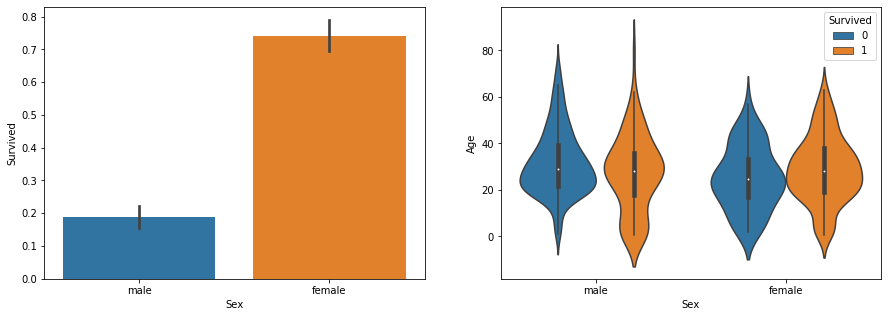

In [156]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(df.Sex, df.Survived)
plt.subplot(1,2,2)
sns.violinplot(df.Sex, df.Age, hue=df.Survived)